In [1]:
import pandas as pd
pd.set_option('mode.use_inf_as_na', True)
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("data/forest.csv")
#df2=pd.read_csv("data/test.csv")

In [3]:
df_train=pd.DataFrame(df1)
#df_test=pd.DataFrame(df2)

In [135]:
df_train1=df_train.copy()

In [44]:
df_train['Cover_Type'].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [75]:
categories={0.:'SPRUCE / FIR',1.:'PONDEROSA PINE',2.:'COTTONWOOD / WILLOW',
                    3.:'ASPEN',4.:'DOUGLAS-FIR',5.: 'Krummholz', 6.:'LODGEPOLE PINE'}
output=[3.]
#my_arrat=tuple(output)
#predicted_index = np.argmax(output)
#results = {output: categories}
#print(results)
results=categories[output[0]]
results

'ASPEN'

In [42]:
df_train.iloc[15119]

Id                                    15120
Elevation                              2475
Aspect                                  197
Slope                                    34
Horizontal_Distance_To_Hydrology        319
Vertical_Distance_To_Hydrology           78
Horizontal_Distance_To_Roadways         270
Hillshade_9am                           189
Hillshade_Noon                          244
Hillshade_3pm                           164
Horizontal_Distance_To_Fire_Points      914
Wilderness_Area1                          0
Wilderness_Area2                          0
Wilderness_Area3                          1
Wilderness_Area4                          0
Soil_Type1                                0
Soil_Type2                                1
Soil_Type3                                0
Soil_Type4                                0
Soil_Type5                                0
Soil_Type6                                0
Soil_Type7                                0
Soil_Type8                      

In [5]:
df_train.shape

(15120, 56)

In [24]:
df_train["Cover_Type"].values

array([5, 5, 2, ..., 3, 3, 3], dtype=int64)

In [6]:
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [139]:
df_train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [140]:
df_train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [141]:
soil_dummy = df_train.loc[:,df_train.columns.str.startswith('Soil_Type')]
wild_dummy=df_train.loc[:,df_train.columns.str.startswith('Wilderness_Area')]
wild = wild_dummy.idxmax(axis=1)
soil = soil_dummy.idxmax(axis=1)
wild.name = 'Wilderness'
soil.name = 'Soil'
df_train['Wilderness']= wild
df_train['Soil'] = soil

In [142]:
df_train.drop(columns=['Wilderness_Area1',
                       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4','Soil_Type7','Soil_Type15',
                       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                        'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
                        'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
                        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
                        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
                        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
                        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], axis=1,inplace=True)

In [143]:
df_cat=[feature for feature in df_train.columns if df_train[feature].dtype=='O']
df_num=[feature for feature in df_train.columns if df_train[feature].dtype!='O']
print(df_cat)
print(df_num)

['Wilderness', 'Soil']
['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']


In [144]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness,Soil
0,1,2596,51,3,258,0,510,221,232,148,6279,5,Wilderness_Area1,Soil_Type29
1,2,2590,56,2,212,-6,390,220,235,151,6225,5,Wilderness_Area1,Soil_Type29
2,3,2804,139,9,268,65,3180,234,238,135,6121,2,Wilderness_Area1,Soil_Type12
3,4,2785,155,18,242,118,3090,238,238,122,6211,2,Wilderness_Area1,Soil_Type30
4,5,2595,45,2,153,-1,391,220,234,150,6172,5,Wilderness_Area1,Soil_Type29


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

On careful observation of the data we can initially summarise the following :
1. Numerical data was on Elevation, Slope, Aspect, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points
2. Categorical/nominal/ordinal data can be interferred on Wilderness Area1 - 4 and Soil_Type1 - 40 (total of 44 columns)
3. Output categorical data on Cover_type
4. Vertical_Distance_To_Hydrology has absurd values of -ve and 0. Need proper correction


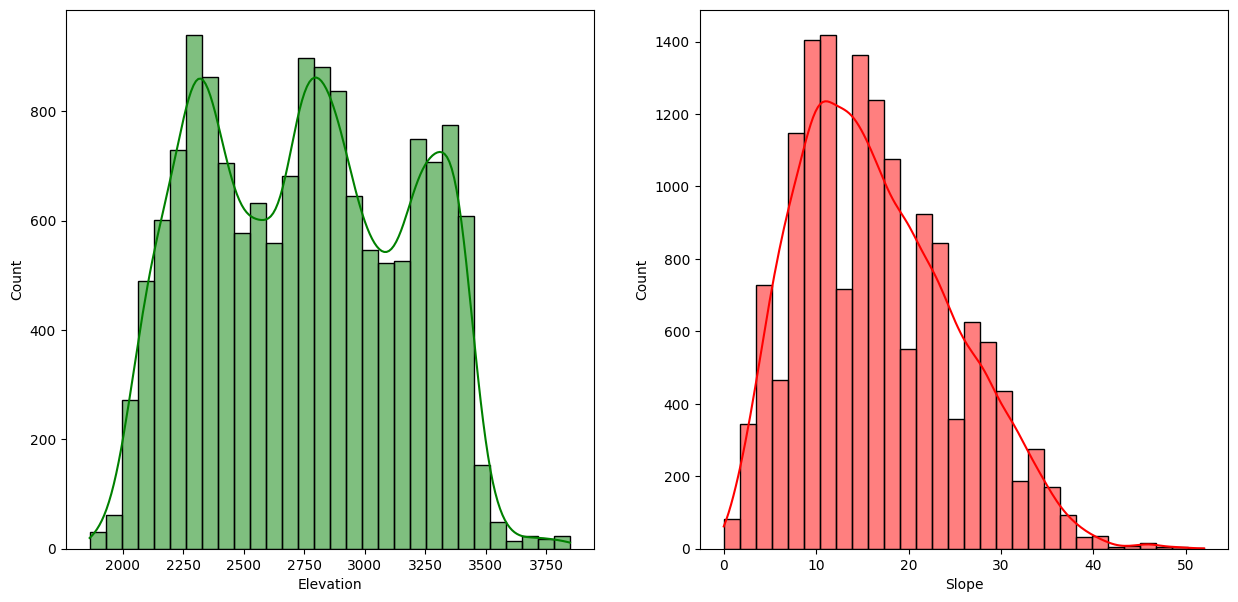

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_train,x=df_train["Elevation"],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_train,x=df_train["Slope"],kde=True,bins=30,color='r')
plt.show()

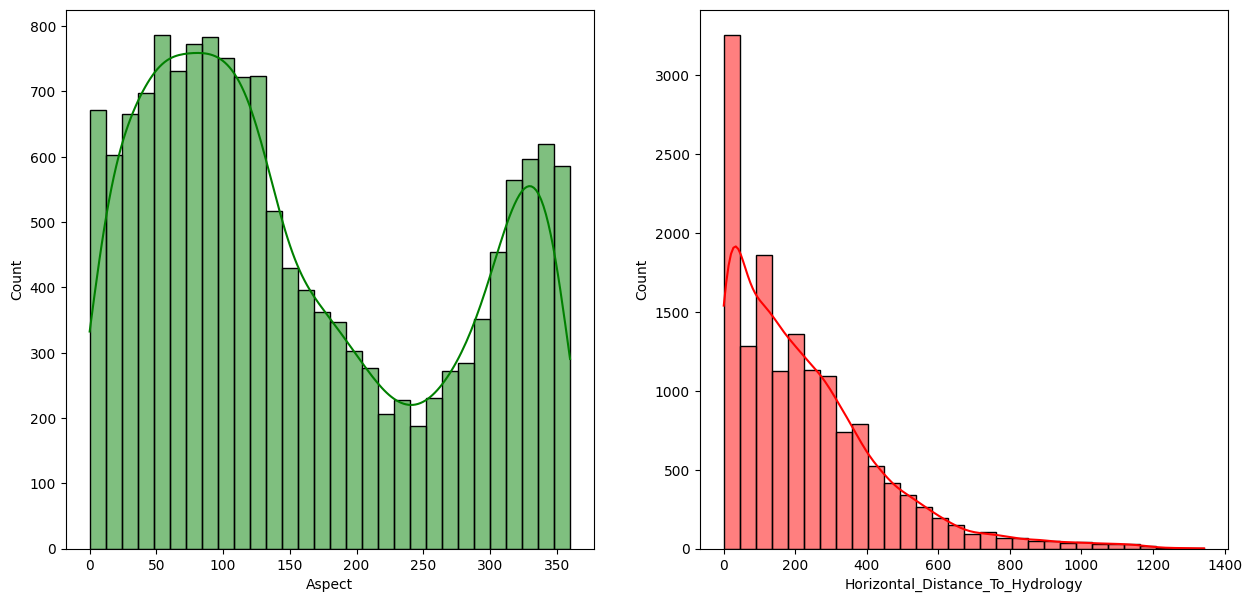

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_train,x=df_train["Aspect"],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_train,x=df_train["Horizontal_Distance_To_Hydrology"],kde=True,bins=30,color='r')
plt.show()

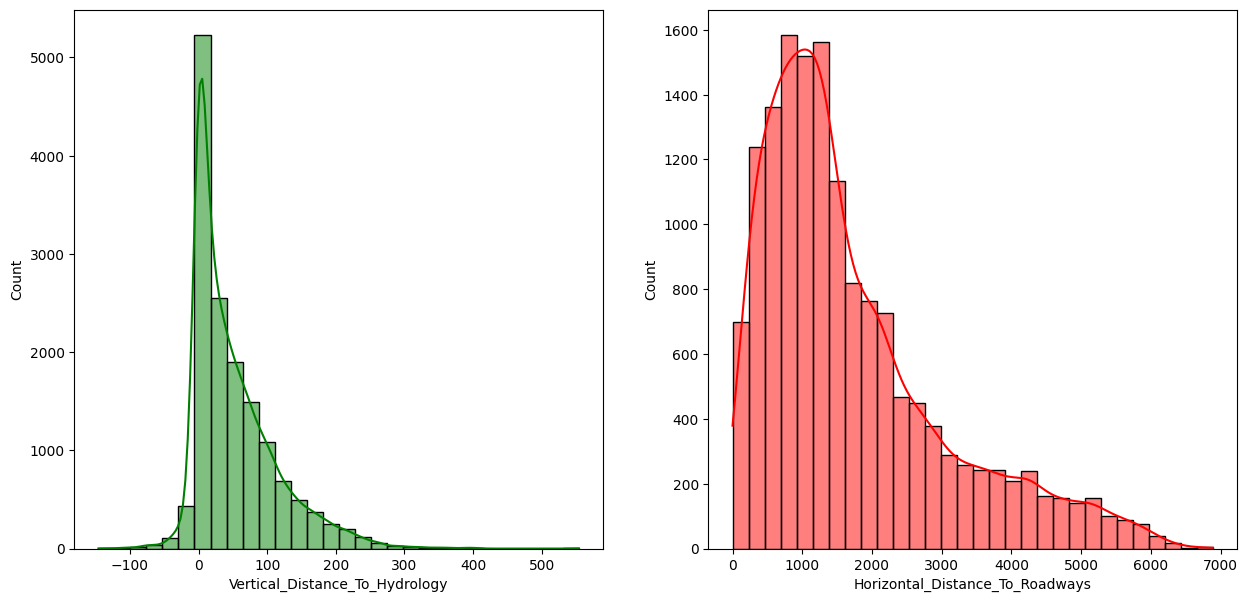

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df_train,x=df_train["Vertical_Distance_To_Hydrology"],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df_train,x=df_train["Horizontal_Distance_To_Roadways"],kde=True,bins=30,color='r')
plt.show()

Since there are number of negative values in Vertical_distance_to_Hydrology, and this cannot be negative.
Converting negative into absolute value.
Converting 0 to 1 as on log transfrmation it will be 0 rather convert to -inf
Coverting exixting infinte values to 1. As neative infinite values makes no sense and effects calculations
Converting all -ve infinite to 1. Which on log transformation converts to 0.

In [ ]:
#Transformation to absolute values and finite numbers for all -ve , 0 and inifinte values 

df_train["Vertical_Distance_To_Hydrology"]=abs(df_train["Vertical_Distance_To_Hydrology"])
df_train["Vertical_Distance_To_Hydrology"] = np.where(df_train["Vertical_Distance_To_Hydrology"]==0,1,df_train["Vertical_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Roadways"] = np.where(df_train["Horizontal_Distance_To_Roadways"]<=0,1,df_train["Horizontal_Distance_To_Roadways"])
df_train["Horizontal_Distance_To_Hydrology"] = np.where(df_train["Horizontal_Distance_To_Hydrology"]<=0,1,df_train["Horizontal_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Fire_Points"] = np.where(df_train["Horizontal_Distance_To_Fire_Points"]<=0,1,df_train["Horizontal_Distance_To_Fire_Points"])

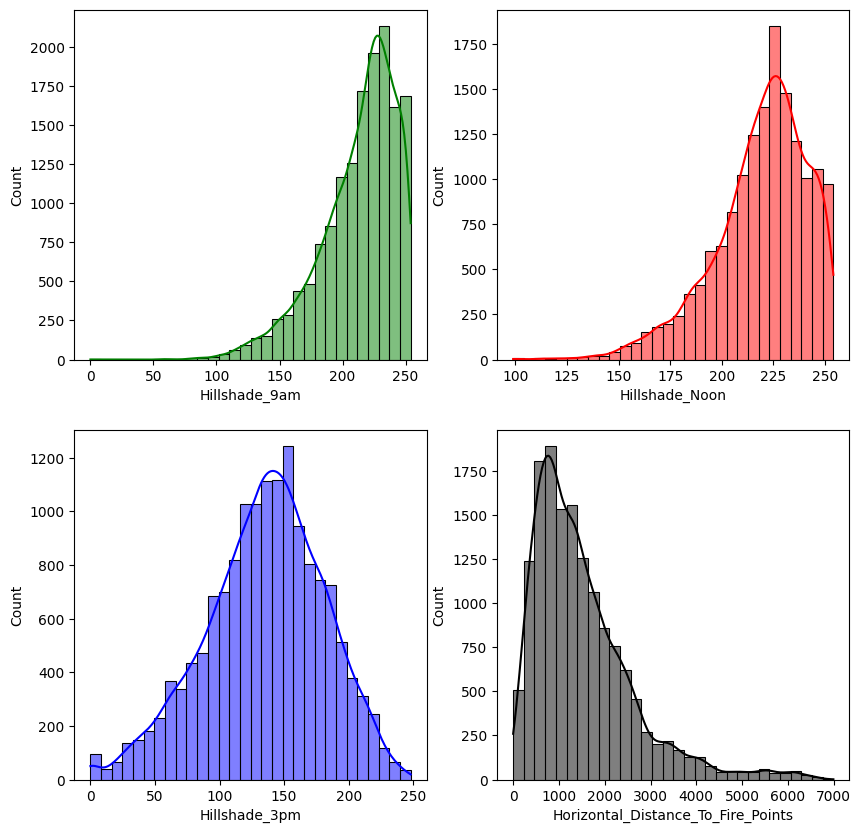

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(10, 10))
plt.subplot(221)
sns.histplot(data=df_train,x=df_train["Hillshade_9am"],bins=30,kde=True,color='g')
plt.subplot(222)
sns.histplot(data=df_train,x=df_train["Hillshade_Noon"],kde=True,bins=30,color='r')
plt.subplot(223)
sns.histplot(data=df_train,x=df_train["Hillshade_3pm"],kde=True,bins=30,color='b')
plt.subplot(224)
sns.histplot(data=df_train,x=df_train["Horizontal_Distance_To_Fire_Points"],kde=True,bins=30,color='k')
plt.show()

From the visuals of distribution of numerical data the following can be be assumed:
All the numerical vsriables except Hillshade_3pm and slope need to be transformed to gaussian distribution by log transformation or any other methodologies.

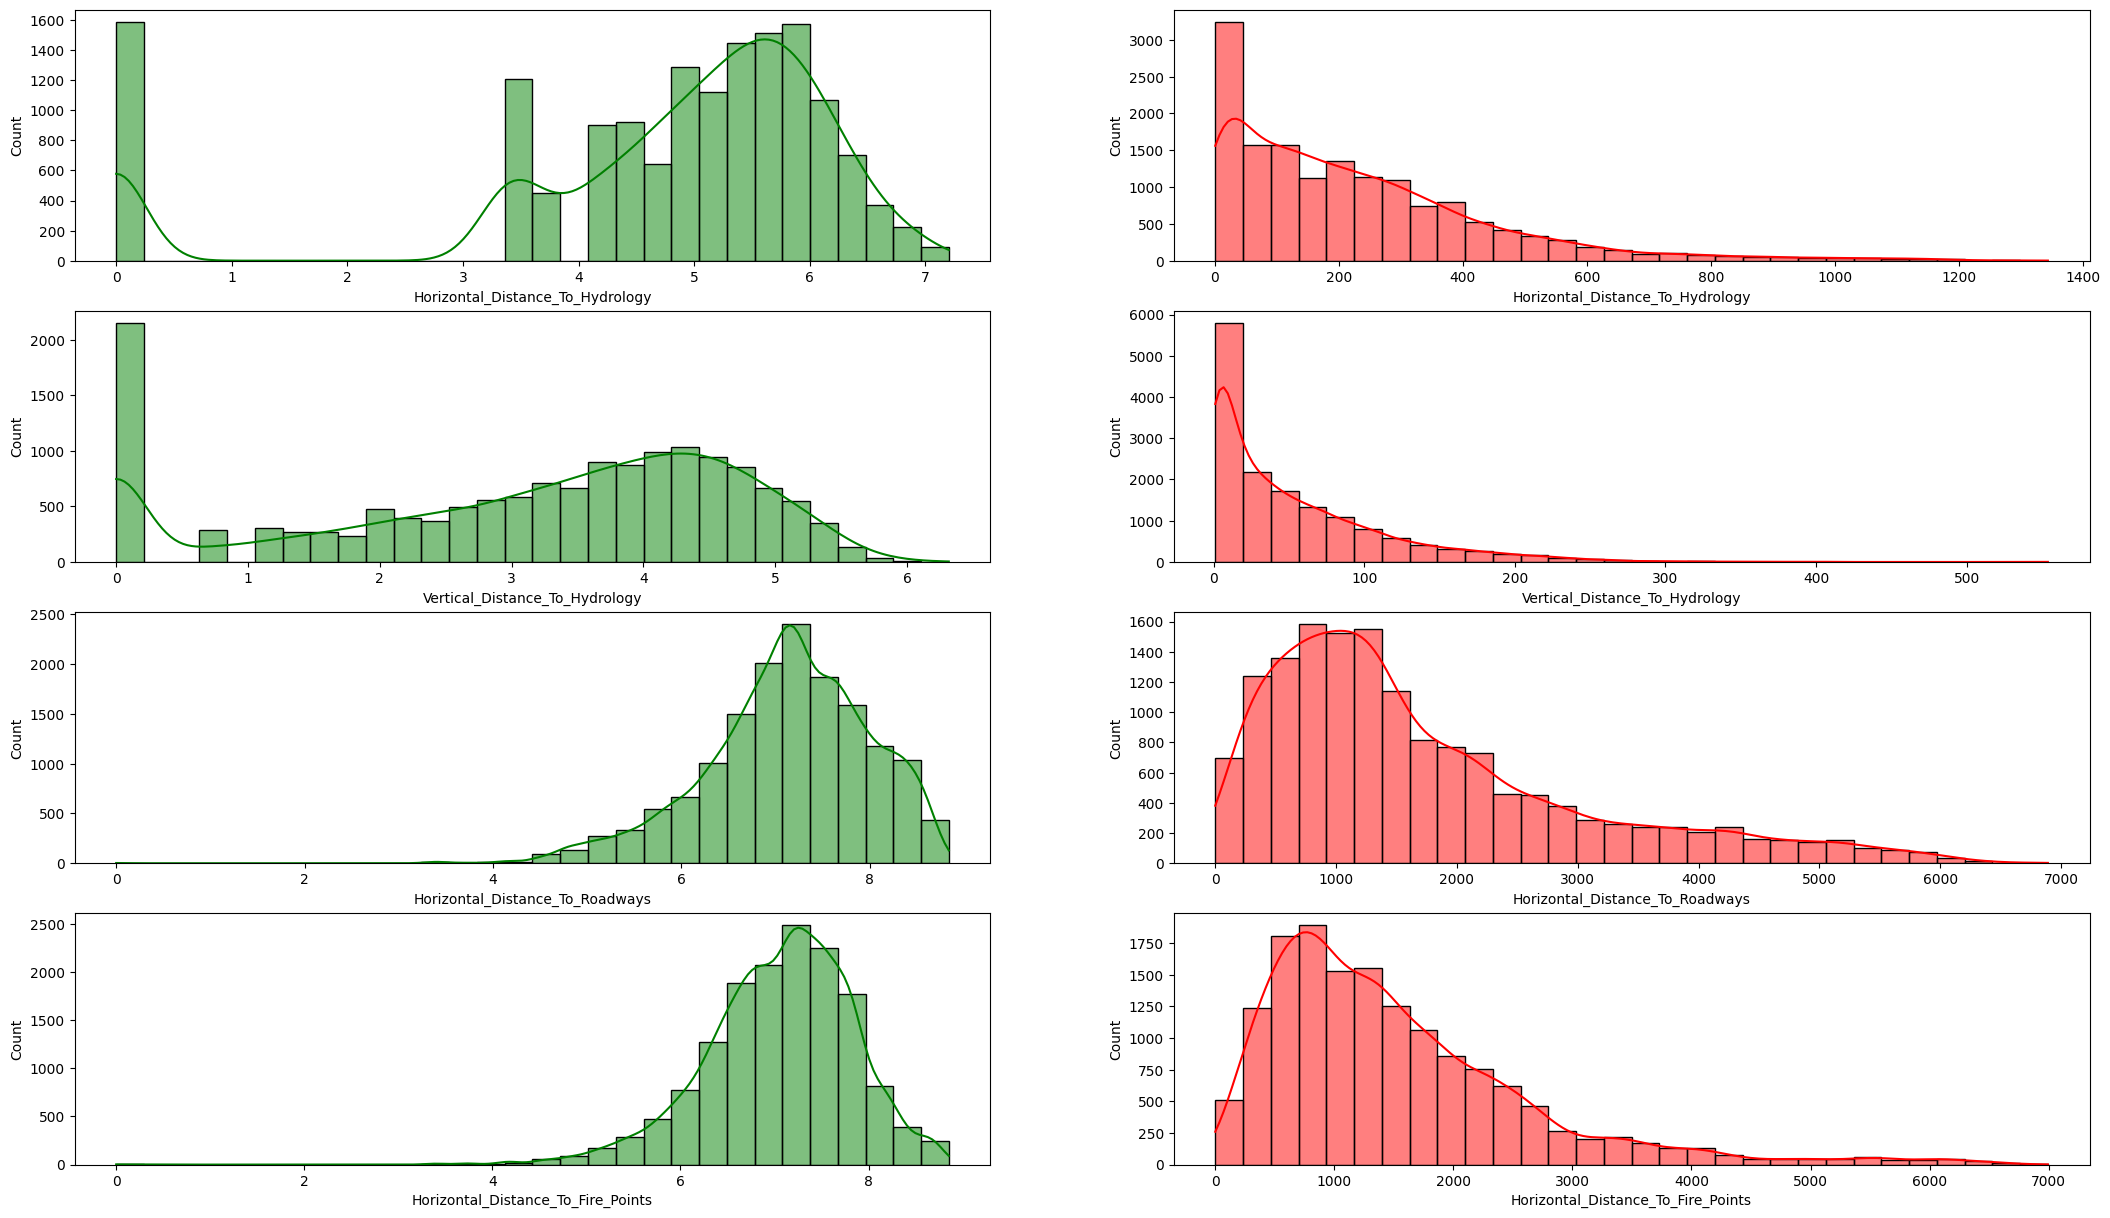

In [ ]:
#Converting the right skewed data by log transformation to normal dist: Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,
#Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points

fig, axs = plt.subplots(1, 8, figsize=(26, 15))
plt.subplot(421)
sns.histplot(data=df_train,x=np.log(df_train["Horizontal_Distance_To_Hydrology"]),bins=30,kde=True,color='g')
plt.subplot(422)
sns.histplot(data=df_train,x=(df_train["Horizontal_Distance_To_Hydrology"]),bins=30,kde=True,color='r')

plt.subplot(423)
sns.histplot(data=df_train,x=np.log(df_train["Vertical_Distance_To_Hydrology"]),bins=30,kde=True,color='g')
plt.subplot(424)
sns.histplot(data=df_train,x=(df_train["Vertical_Distance_To_Hydrology"]),bins=30,kde=True,color='r')

plt.subplot(425)
sns.histplot(data=df_train,x=np.log(df_train["Horizontal_Distance_To_Roadways"]),bins=30,kde=True,color='g')
plt.subplot(426)
sns.histplot(data=df_train,x=(df_train["Horizontal_Distance_To_Roadways"]),bins=30,kde=True,color='r')

plt.subplot(427)
sns.histplot(data=df_train,x=np.log(df_train["Horizontal_Distance_To_Fire_Points"]),bins=30,kde=True,color='g')
plt.subplot(428)
sns.histplot(data=df_train,x=(df_train["Horizontal_Distance_To_Fire_Points"]),bins=30,kde=True,color='r')
plt.show()

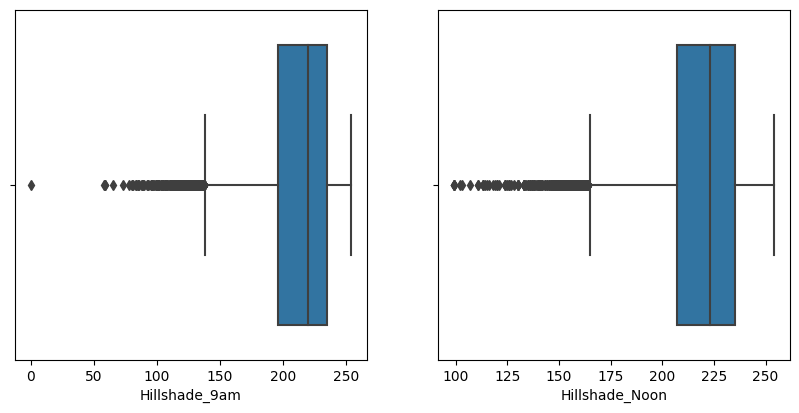

In [ ]:
#Hillshade_9am,Hillshade_Noon

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
plt.subplot(221)
sns.boxplot(data=df_train, x="Hillshade_9am",hue="Cover_Type")
plt.subplot(222)
sns.boxplot(data=df_train, x="Hillshade_Noon",hue="Cover_Type")
plt.show()

In [ ]:

# finding the 1st quartile
q1 = np.quantile(df_train["Hillshade_9am"], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df_train["Hillshade_9am"], 0.75)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = (q3+(1.5*iqr))
lower_bound = (q1-(1.5*iqr))
print(iqr, upper_bound, lower_bound)

outliers = df_train["Hillshade_9am"][(df_train["Hillshade_9am"] <= lower_bound) | (df_train["Hillshade_9am"] >= upper_bound)]
#print('The following are the outliers in the boxplot:{}'.format(outliers))

39.0 293.5 137.5


In [ ]:
# finding the 1st quartile
q11 = np.quantile(df_train["Hillshade_Noon"], 0.25)
 
# finding the 3rd quartile
q31 = np.quantile(df_train["Hillshade_Noon"], 0.75)
med = np.median(df_train["Hillshade_Noon"])
 
# finding the iqr region
iqr1 = q31-q11
 
# finding upper and lower whiskers
upper_bound1 = (q31+(1.5*iqr1))
lower_bound1 = (q11-(1.5*iqr1))
print(iqr1, upper_bound1, lower_bound1)

28.0 277.0 165.0


In [ ]:
#median=(stats.median(df_train['Hillshade_9am']))
df_train["Hillshade_Noon"] = np.where(df_train["Hillshade_Noon"] <=lower_bound1,med,df_train['Hillshade_Noon'])

In [ ]:
median=(stats.median(df_train['Hillshade_9am']))
df_train["Hillshade_9am"] = np.where(df_train["Hillshade_9am"] <=lower_bound,median,df_train['Hillshade_9am'])

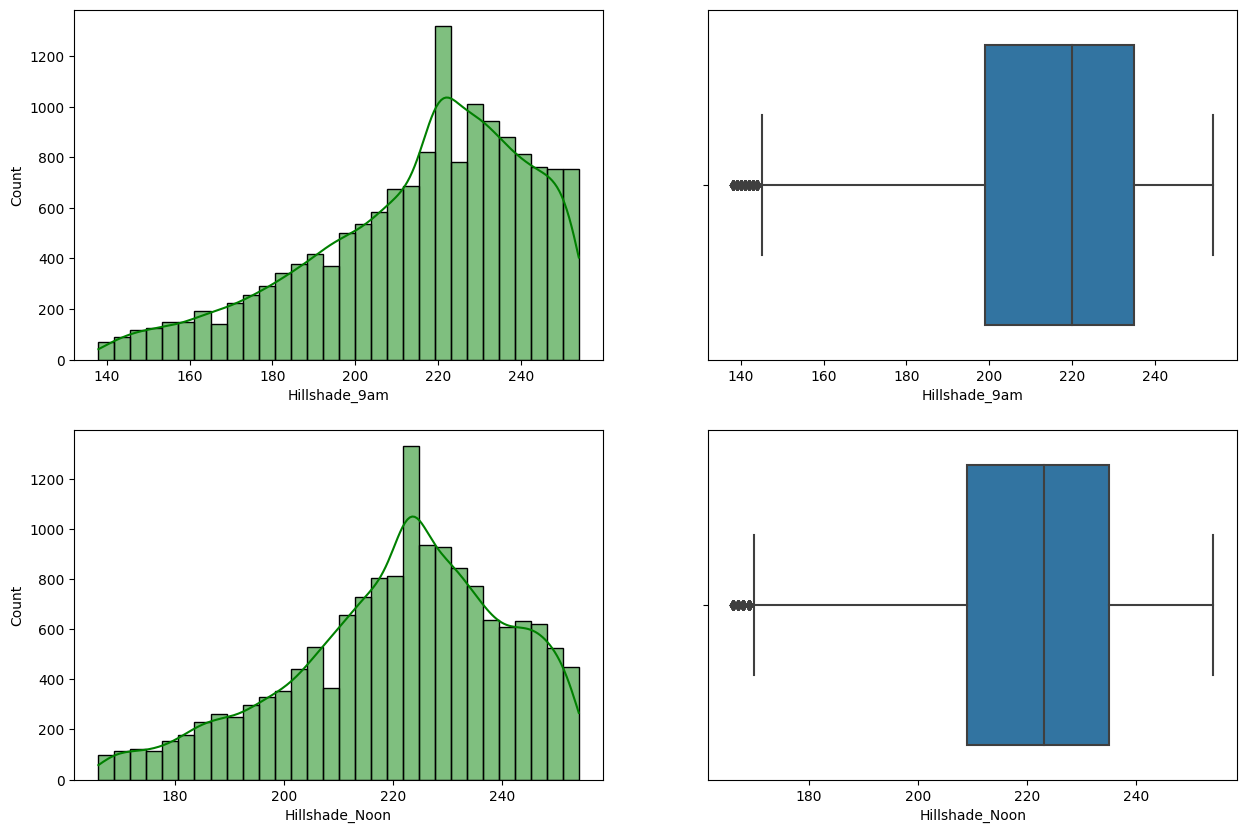

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))
plt.subplot(221)
sns.histplot(data=df_train,x=df_train["Hillshade_9am"],bins=30,kde=True,color='g')

plt.subplot(222)
sns.boxplot(data=df_train, x="Hillshade_9am",hue="Cover_Type")

plt.subplot(223)
sns.histplot(data=df_train,x=df_train["Hillshade_Noon"],bins=30,kde=True,color='g')

plt.subplot(224)
sns.boxplot(data=df_train, x="Hillshade_Noon",hue="Cover_Type")
plt.show()

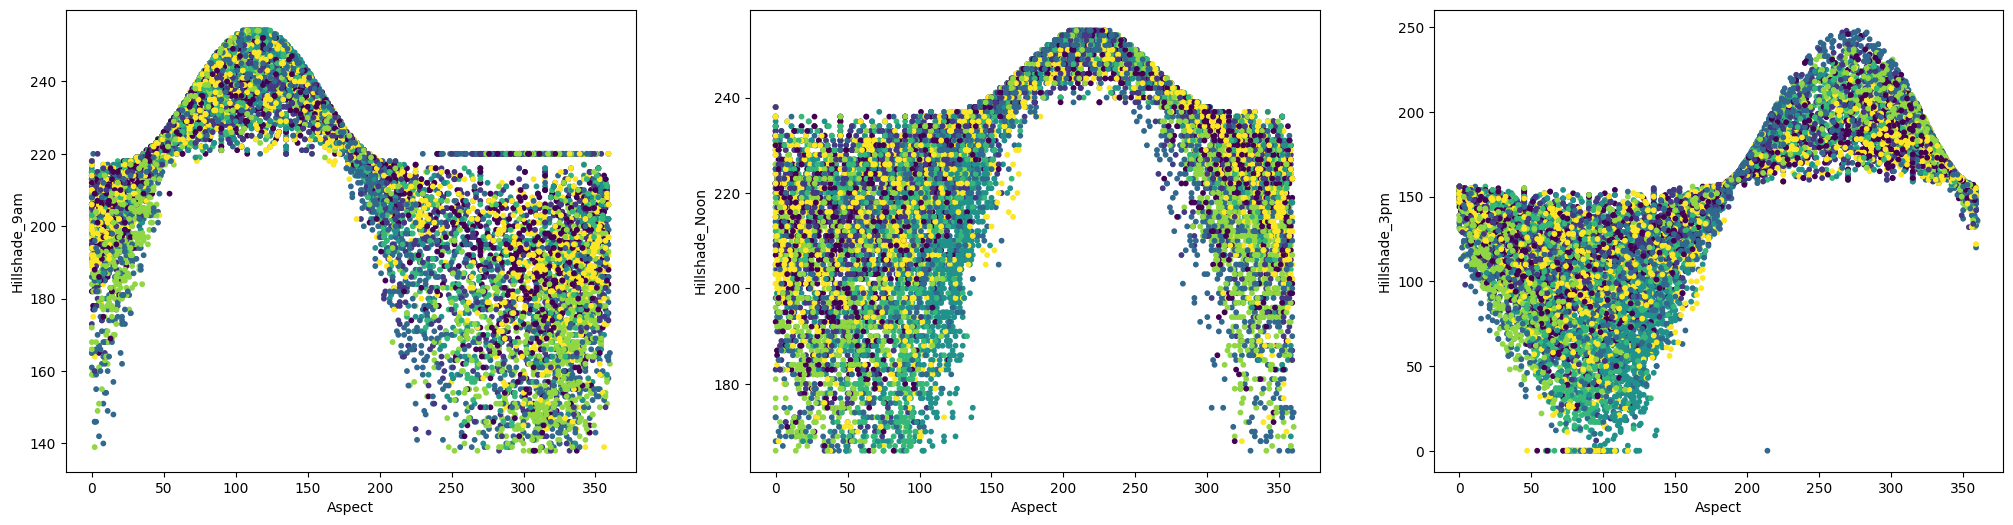

In [ ]:
classes = np.array(list(df_train.Cover_Type.values))

def plotRelation(first_feature, sec_feature,cmap='viridis'):
    plt.scatter(first_feature, sec_feature, c = classes, s=10,cmap=cmap)
    plt.xlabel(first_feature.name)
    plt.ylabel(sec_feature.name)
    
f = plt.figure(figsize=(25,6))
f.add_subplot(131)
plotRelation( df_train.Aspect,df_train.Hillshade_9am)
f.add_subplot(132)
plotRelation(df_train.Aspect,df_train.Hillshade_Noon)
f.add_subplot(133)
plotRelation(df_train.Aspect,df_train.Hillshade_3pm)

In [ ]:
#Converting and inserting the log transformation data in: Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,
#Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points
df_train["Horizontal_Distance_To_Hydrology"]=np.log(df_train["Horizontal_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Roadways"]=np.log(df_train["Horizontal_Distance_To_Roadways"])
df_train["Vertical_Distance_To_Hydrology"]=np.log(df_train["Vertical_Distance_To_Hydrology"])
df_train["Horizontal_Distance_To_Fire_Points"]=np.log(df_train["Horizontal_Distance_To_Fire_Points"])

In [ ]:
df_train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [ ]:
soil_dummy = df_train.loc[:,df_train.columns.str.startswith('Soil_Type')]
wild_dummy=df_train.loc[:,df_train.columns.str.startswith('Wilderness_Area')]


In [ ]:
soil_dummy.head()

,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


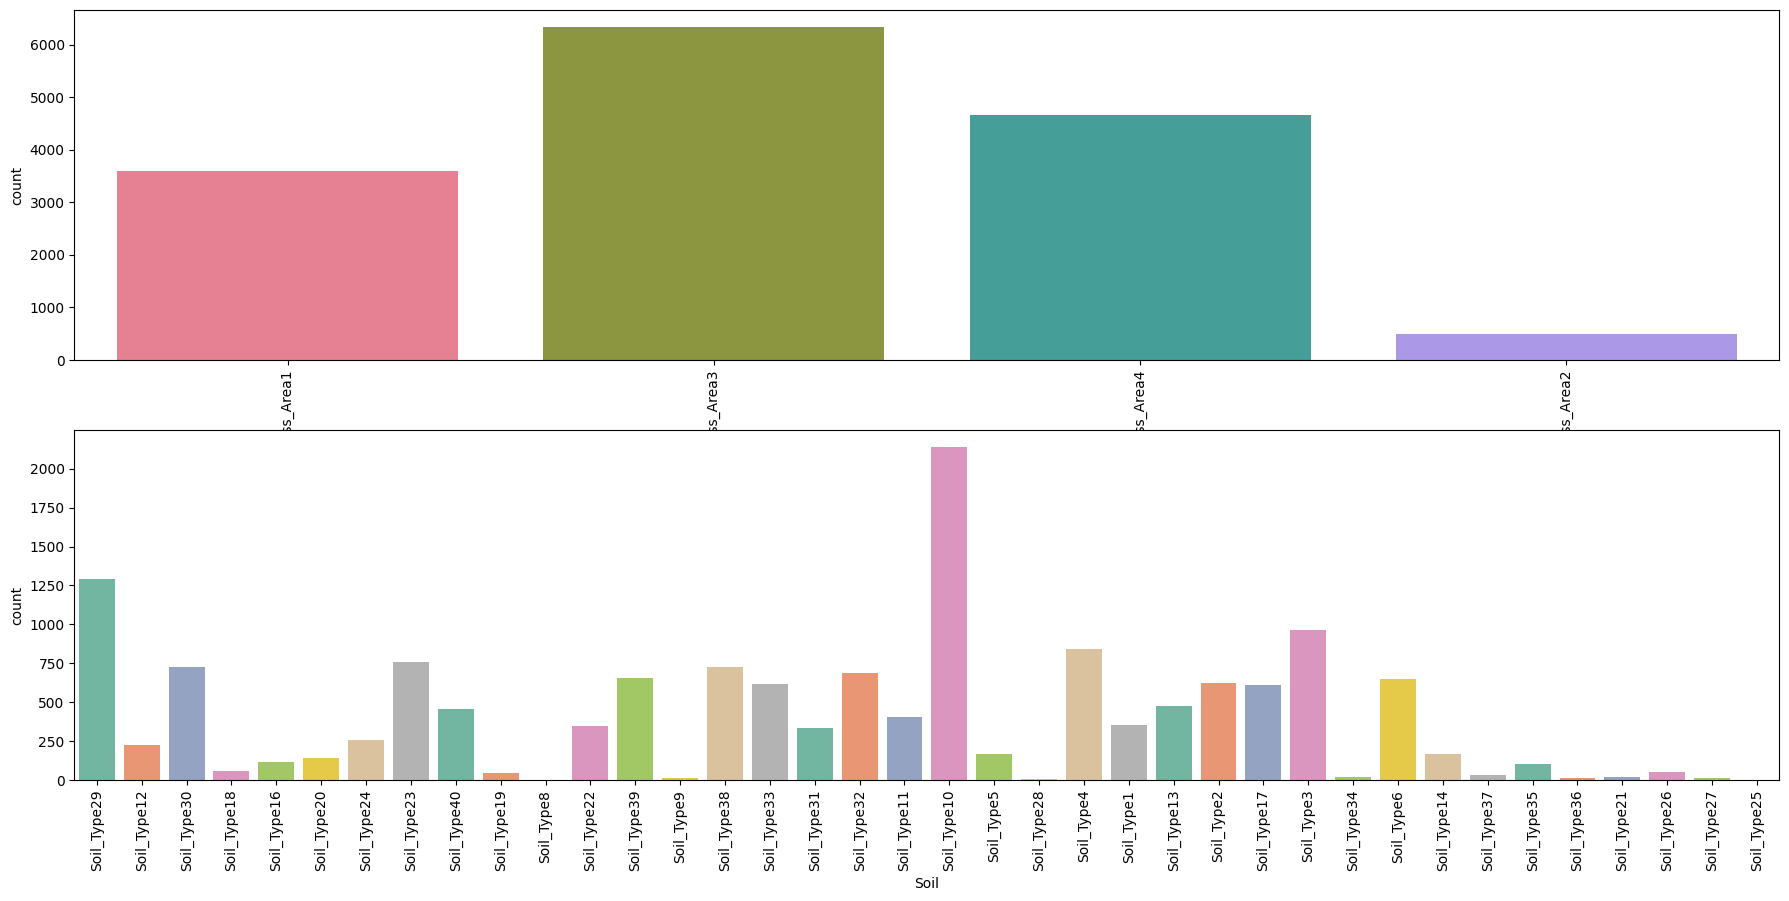

In [ ]:
soil_dummy = df_train.loc[:,df_train.columns.str.startswith('Soil_Type')]
wild_dummy=df_train.loc[:,df_train.columns.str.startswith('Wilderness_Area')]
wild = wild_dummy.idxmax(axis=1)
soil = soil_dummy.idxmax(axis=1)
wild.name = 'Wilderness'
soil.name = 'Soil'
df_train['Wilderness']= wild
df_train['Soil'] = soil
fig, axs = plt.subplots(1, 2, figsize=(22,10))
plt.subplot(211)
sns.countplot(x='Wilderness',data=df_train,palette="husl")
plt.xticks(rotation=90)
plt.subplot(212)
sns.countplot(x='Soil',data=df_train,palette="Set2")
plt.xticks(rotation=90)
plt.show()

In [ ]:
soil_dummy.sum()

Soil_Type1      355
Soil_Type2      623
Soil_Type3      962
Soil_Type4      843
Soil_Type5      165
Soil_Type6      650
Soil_Type7        0
Soil_Type8        1
Soil_Type9       10
Soil_Type10    2142
Soil_Type11     406
Soil_Type12     227
Soil_Type13     476
Soil_Type14     169
Soil_Type15       0
Soil_Type16     114
Soil_Type17     612
Soil_Type18      60
Soil_Type19      46
Soil_Type20     139
Soil_Type21      16
Soil_Type22     345
Soil_Type23     757
Soil_Type24     257
Soil_Type25       1
Soil_Type26      54
Soil_Type27      15
Soil_Type28       9
Soil_Type29    1291
Soil_Type30     725
Soil_Type31     332
Soil_Type32     690
Soil_Type33     616
Soil_Type34      22
Soil_Type35     102
Soil_Type36      10
Soil_Type37      34
Soil_Type38     728
Soil_Type39     657
Soil_Type40     459
dtype: int64

In [ ]:
df_train.drop(['Soil_Type15','Soil_Type7','Id'],axis=1, inplace=True)
#df_train=df_train.drop("Soil_Type7",axis=1, inplace=True)


In [ ]:
df_train.shape

(15120, 55)

In [ ]:
#Segregating the numerical features for heatmap correlation
X_num=df_train.iloc[:,:10]
X_num.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,5.552960,0.000000,6.234411,221.0,232.0,148,8.744966
1,2590,56,2,5.356586,1.791759,5.966147,220.0,235.0,151,8.736329
2,2804,139,9,5.590987,4.174387,8.064636,234.0,238.0,135,8.719481
3,2785,155,18,5.488938,4.770685,8.035926,238.0,238.0,122,8.734077
4,2595,45,2,5.030438,0.000000,5.968708,220.0,234.0,150,8.727778


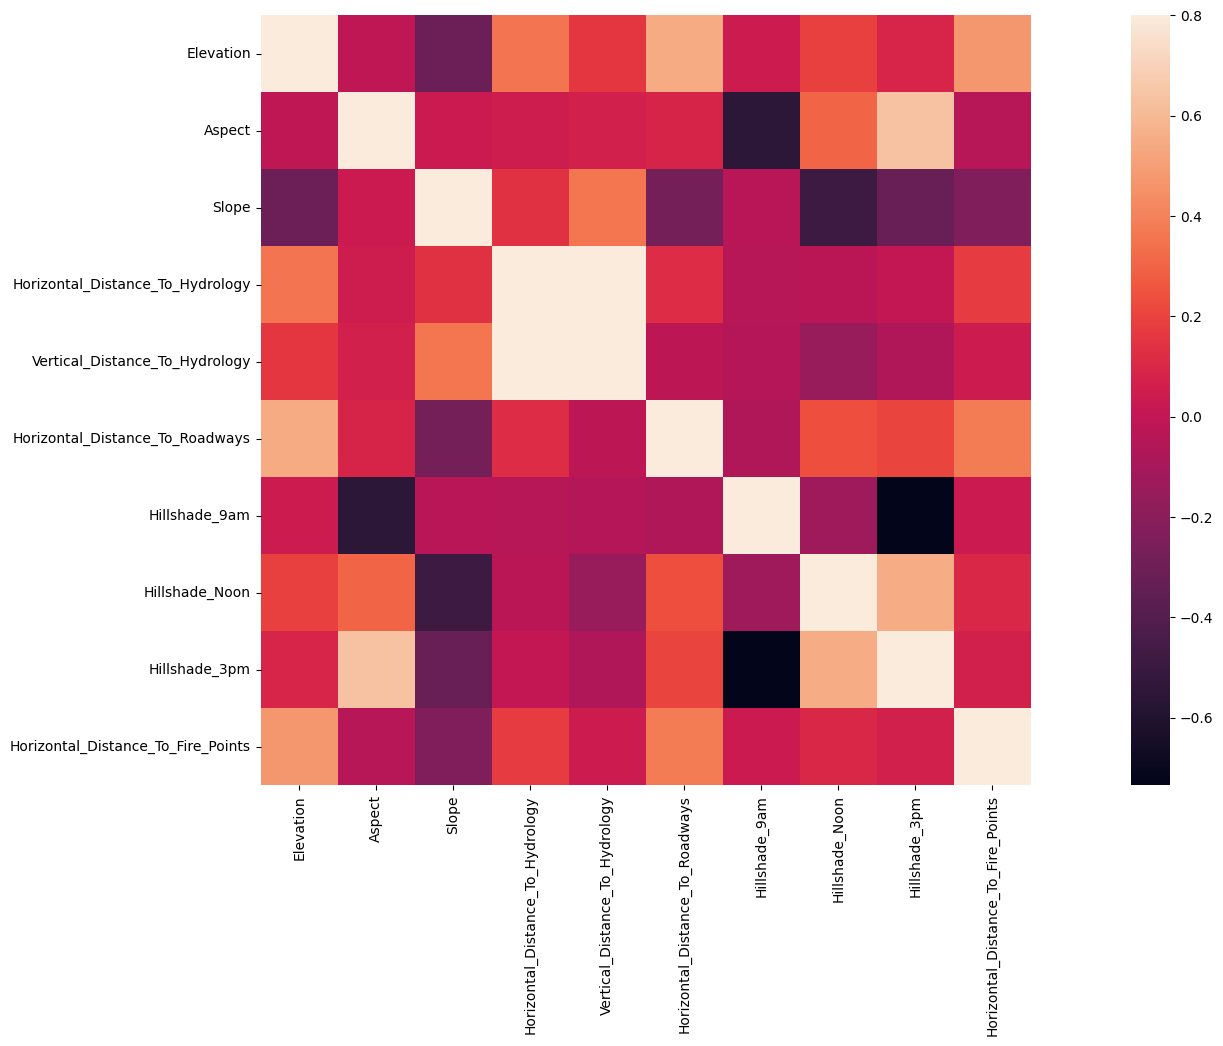

In [ ]:
fig, axis = plt.subplots(figsize = (26,10))
sns.heatmap(X_num.corr(),vmax=0.8,square=True)
plt.show()

Some Strong Correlation is observed as follows:
1. Hillshade_9am and Hillshade_3pm
2. Hillshade_9am and Aspect
3. Hillshade_noon and slope
4. Horizontal_Distance_To_roadways, Elevation and Slope

In [ ]:
X_num.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Elevation,1.000000,-0.011096,-0.312640,0.354252,0.154996,0.545762,0.035442,0.183919,0.089518,0.470549
Aspect,-0.011096,1.000000,0.028148,0.043321,0.066759,0.085855,-0.555086,0.299228,0.635022,-0.045379
Slope,-0.312640,0.028148,1.000000,0.137178,0.361256,-0.274297,-0.033929,-0.489429,-0.326887,-0.238731
Horizontal_Distance_To_Hydrology,0.354252,0.043321,0.137178,1.000000,0.810311,0.117756,-0.041074,-0.031857,0.002220,0.170507
Vertical_Distance_To_Hydrology,0.154996,0.066759,0.361256,0.810311,1.000000,-0.019522,-0.052426,-0.151040,-0.069114,0.035106
Horizontal_Distance_To_Roadways,0.545762,0.085855,-0.274297,0.117756,-0.019522,1.000000,-0.064102,0.231611,0.204949,0.374659
Hillshade_9am,0.035442,-0.555086,-0.033929,-0.041074,-0.052426,-0.064102,1.000000,-0.134461,-0.735075,0.030895
Hillshade_Noon,0.183919,0.299228,-0.489429,-0.031857,-0.151040,0.231611,-0.134461,1.000000,0.549132,0.104216
Hillshade_3pm,0.089518,0.635022,-0.326887,0.002220,-0.069114,0.204949,-0.735075,0.549132,1.000000,0.062791
Horizontal_Distance_To_Fire_Points,0.470549,-0.045379,-0.238731,0.170507,0.035106,0.374659,0.030895,0.104216,0.062791,1.000000


#Further scaling the data using MinMax Scaler.

In [ ]:
trans=MinMaxScaler()
data=trans.fit_transform(X_num)
dataset=pd.DataFrame(data)

In [ ]:
X_num.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,4.637869,3.075505,7.122958,215.382407,220.925331,135.091997,7.057033
std,417.678187,110.085801,8.453927,1.807216,1.663254,0.877273,26.333045,19.693667,45.895189,0.777533
min,1863.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138.000000,166.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,4.204693,2.079442,6.638568,199.000000,209.000000,106.000000,6.593045
50%,2752.000000,126.000000,15.000000,5.192957,3.526361,7.182352,220.000000,223.000000,138.000000,7.135687
75%,3104.000000,261.000000,22.000000,5.799093,4.382027,7.727535,235.000000,235.000000,167.000000,7.595010
max,3849.000000,360.000000,52.000000,7.202661,6.317165,8.837826,254.000000,254.000000,248.000000,8.852665


In [ ]:
df_train.drop(columns=['Wilderness_Area1',
                       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
                       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                        'Soil_Type6', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
                        'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
                        'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
                        'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                        'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
                        'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
                        'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
                        'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], axis=1,inplace=True)

In [ ]:
df_train['Soil'].unique()

array(['Soil_Type29', 'Soil_Type12', 'Soil_Type30', 'Soil_Type18',
       'Soil_Type16', 'Soil_Type20', 'Soil_Type24', 'Soil_Type23',
       'Soil_Type40', 'Soil_Type19', 'Soil_Type8', 'Soil_Type22',
       'Soil_Type39', 'Soil_Type9', 'Soil_Type38', 'Soil_Type33',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type11', 'Soil_Type10',
       'Soil_Type5', 'Soil_Type28', 'Soil_Type4', 'Soil_Type1',
       'Soil_Type13', 'Soil_Type2', 'Soil_Type17', 'Soil_Type3',
       'Soil_Type34', 'Soil_Type6', 'Soil_Type14', 'Soil_Type37',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type21', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type25'], dtype=object)

In [39]:
d2=pd.read_csv('data/test.csv')
d1=pd.read_csv('data/train.csv')

In [41]:
df_train=d1
df_test=d2

#logging.info("Read Train ans test data completed")
#logging.info("obtaining preprocesser object")

#preprocessor_obj=self.get_transformer_object()
target_column_name="Cover_Type"

cat_columns=["Wilderness","Soil"]

numerical_columns=['Elevation', 'Aspect', 'Slope',
                    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
                    'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
df_train[numerical_columns]=abs(df_train[numerical_columns])
df_test[numerical_columns]=abs(df_test[numerical_columns])
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
le=LabelEncoder()
df_train[target_column_name]=le.fit_transform(df_train[target_column_name])
df_test[target_column_name]=le.transform(df_test[target_column_name])

dff=np.where(df_train[numerical_columns]<0,0,df_train[numerical_columns])
df_train[numerical_columns]=pd.DataFrame(dff, columns=numerical_columns)

dtt=np.where(df_test[numerical_columns]<0,0,df_test[numerical_columns])
df_test[numerical_columns]=pd.DataFrame(dtt, columns=numerical_columns)

q1 = df_train[numerical_columns].quantile(0.25)
q3 = df_train[numerical_columns].quantile(0.75)
iqr = q3-q1
med=df_train[numerical_columns].median()
upper_bound = (q3+(1.5*iqr))
lower_bound = (q1-(1.5*iqr))

doo = np.where(df_train[numerical_columns] <=lower_bound,med,df_train[numerical_columns])
doo1= np.where(df_train[numerical_columns] >=upper_bound,med,doo)
df_train[numerical_columns]=pd.DataFrame(doo1, columns=numerical_columns)

q11 = df_test[numerical_columns].quantile(0.25)
q31 = df_test[numerical_columns].quantile(0.75)
iqr1 = q31-q11
med1=df_test[numerical_columns].median()
upper_bound1 = (q31+(1.5*iqr1))
lower_bound1 = (q11-(1.5*iqr1))

d1 = np.where(df_test[numerical_columns] <=lower_bound1,med1,df_test[numerical_columns])
d2= np.where(df_test[numerical_columns] >=upper_bound1,med1,d1)
df_test[numerical_columns]=pd.DataFrame(d2, columns=numerical_columns)           


target_feature_train_df=df_train[target_column_name]
input_feature_train_df=df_train.drop(columns=['Cover_Type','Id'],axis=1)
    

target_feature_test_df=df_test[target_column_name]
#target_feature_test_df=target_feature_test_df.astype(int)
input_feature_test_df=df_test.drop(columns=['Cover_Type','Id'],axis=1)
input_feature_test_df.shape

(3024, 12)

In [15]:
df_train_arr=np.c_[(input_feature_train_df,np.array(target_feature_train_df))]
test_arr = np.c_[input_feature_test_df,target_feature_test_df]  
test_arr

array([[2432.0, 147.0, 16.0, ..., 'Wilderness_Area4', 'Soil_Type6', 5],
       [2653.0, 114.0, 14.0, ..., 'Wilderness_Area3', 'Soil_Type10', 2],
       [3542.0, 315.0, 31.0, ..., 'Wilderness_Area1', 'Soil_Type40', 0],
       ...,
       [2784.0, 88.0, 12.0, ..., 'Wilderness_Area1', 'Soil_Type30', 4],
       [2343.0, 184.0, 14.0, ..., 'Wilderness_Area4', 'Soil_Type6', 3],
       [2104.0, 154.0, 9.0, ..., 'Wilderness_Area4', 'Soil_Type17', 3]],
      dtype=object)

In [66]:
np.c_[onehot_df,np.array(target_feature_test_df)]
#onehot_df.shape
#input_feature_train_df.shape

array([[0., 0., 0., ..., 1., 0., 5.],
       [0., 0., 1., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 4.],
       [0., 0., 0., ..., 1., 0., 3.],
       [0., 0., 0., ..., 0., 0., 3.]])

In [27]:
np.c_[np.array([[1,2,3]]), np.array([[4,5,6]])]

array([[1, 2, 3, 4, 5, 6]])

In [61]:
# create a OneHotEncoder object
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# fit and transform the categorical variable
one_hot = encoder.fit_transform(input_feature_test_df[cat_columns])

onehot_df = pd.DataFrame(one_hot)
onehot_df.shape

(3024, 40)